**Situación**
La congestión y el tráfico en las ciudades es un fenómeno natural que emerge de las distintas actividades urbanas y su concentración espacial.

**Complicación**
El transporte de personas también conlleva accidentes, con la correspondiente pérdida de vidas, problemas de salud y lesiones a las personas involucradas, daño a la propiedad pública y privada, y costo de tiempo a personas no involucradas.

**Propuesta**
Caracterizar la accidentabilidad en Santiago para apoyar el diseño de políticas públicas que reduzcan la cantidad de accidentes.

In [1]:
import geopandas as gpd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from aves.features.geo import clip_area_geodataframe
from aves.visualization.figures import small_multiples_from_geodataframe
from aves.visualization.maps import choropleth_map

sns.set_context('paper')
sns.set_style('ticks')

## Construcción del Dataset

In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

True

In [3]:
AVES_ROOT = Path(os.environ['AVES_ROOT'])

https://mapas-conaset.opendata.arcgis.com/

https://mapas-conaset.opendata.arcgis.com/datasets/4b636b2f27164b0ebbeca0ab9db4d08a_0/explore

In [4]:
data_path = AVES_ROOT / "data" / "external" / "conaset"

if not data_path.exists():
    data_path.mkdir(parents=True)

In [5]:
file_path = data_path / "2019-rm-accidents.json"

if not file_path.exists():
    import requests
    r = requests.get('https://opendata.arcgis.com/api/v3/datasets/4b636b2f27164b0ebbeca0ab9db4d08a_0/downloads/data?format=geojson&spatialRefId=4326&where=1%3D1')
    with open(file_path, 'wt') as f:
        f.write(r.text)

In [6]:
gdf = gpd.read_file(file_path, dtypes={'Fecha': 'str', 'Hora': 'str'}).to_crs('epsg:5361')

In [7]:
gdf

,FID,FID_1,LABELID,POINT_X,POINT_Y,FID_2,COMUNAREAL,VAL_COM,OBJECTID,A_O,...,Cód_Condi,Condición,Cód_Est_1,Estado_Atm,Fallecidos,Graves,Menos_Grav,Leves,Ilesos,geometry
0,1,3961,1379667,-70.741329,-33.719780,274,BUIN,1,37967,2021,...,1,SECO,1,DESPEJADO,0,0,0,2,0,POINT (338656.316 6267552.266)
1,2,3962,1325515,-70.727583,-33.719457,274,BUIN,1,1937,2021,...,1,SECO,1,DESPEJADO,0,0,0,0,2,POINT (339929.537 6267609.475)
2,3,3963,1370318,-70.741774,-33.719085,274,BUIN,1,31482,2021,...,1,SECO,1,DESPEJADO,0,0,0,0,2,POINT (338613.770 6267628.618)
3,4,3964,1355153,-70.734031,-33.718968,274,BUIN,1,21418,2021,...,1,SECO,1,DESPEJADO,0,1,0,0,1,POINT (339331.084 6267653.634)
4,5,5750,1364514,-70.710072,-33.500934,129,CERRILLOS,1,27247,2021,...,1,SECO,1,DESPEJADO,0,0,0,0,1,POINT (341151.702 6291868.526)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20910,20911,55793,1325718,-70.640760,-33.383363,190,RECOLETA,2,1735,2021,...,1,SECO,1,DESPEJADO,0,0,0,0,2,POINT (347385.025 6305009.480)
20911,20912,55794,1335059,-70.640760,-33.383363,190,RECOLETA,2,5933,2021,...,1,SECO,1,DESPEJADO,0,0,0,0,2,POINT (347385.025 6305009.480)
20912,20913,55795,1334939,-70.640760,-33.383363,190,RECOLETA,2,5939,2021,...,1,SECO,1,DESPEJADO,0,0,0,0,2,POINT (347385.025 6305009.480)
20913,20914,55796,1332699,-70.640760,-33.383363,190,RECOLETA,2,6669,2021,...,1,SECO,1,DESPEJADO,0,0,0,0,2,POINT (347385.025 6305009.480)


<Axes: >

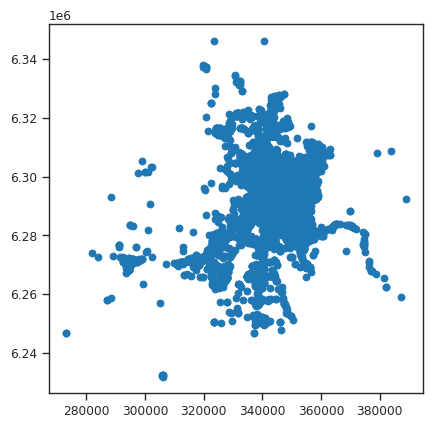

In [8]:
gdf.plot()

In [9]:
gdf.columns

Index(['FID', 'FID_1', 'LABELID', 'POINT_X', 'POINT_Y', 'FID_2', 'COMUNAREAL',
       'VAL_COM', 'OBJECTID', 'A_O', 'IDACCIDENT', 'REGION', 'COD_COMUN',
       'COMUNA', 'CALLE_UNO', 'CALLE_DOS', 'NUMERO', 'DIR_GEOCOD', 'PAIS',
       'TIPO', 'OBJECTID_1', 'Año', 'Idaccide_1', 'Claseaccid', 'Fecha',
       'Hora', 'Cód_Regi', 'Región', 'Cód_Comun', 'Comuna_1', 'Cód_Tipo_',
       'Tipo_Accid', 'Cód_Tipo1', 'Tipo__CONA', 'Cód_Zona', 'Zona',
       'Cód_Ubica', 'Ubicación', 'Cód_Causa', 'Causa__CON', 'Cód_Cau_1',
       'Causa', 'Cód_Calle', 'Calle_Un_1', 'Cód_Cal_1', 'Calle_Do_1',
       'Intersecci', 'Número', 'Ruta', 'Cód_Ruta', 'Ubicaci_1', 'Km_Vía_Fe',
       'Pistas_de_', 'Pistas_de1', 'Cód_Calza', 'Calzada', 'Cód__Tipo',
       'Tipo_Calza', 'Cód_Estad', 'Estado_Cal', 'Cód_Condi', 'Condición',
       'Cód_Est_1', 'Estado_Atm', 'Fallecidos', 'Graves', 'Menos_Grav',
       'Leves', 'Ilesos', 'geometry'],
      dtype='object')

In [10]:
gdf.dtypes

FID              int64
FID_1            int64
LABELID          int64
POINT_X        float64
POINT_Y        float64
                ...   
Graves           int64
Menos_Grav       int64
Leves            int64
Ilesos           int64
geometry      geometry
Length: 70, dtype: object

In [11]:
gdf[['COMUNAREAL', 'Comuna_1']].value_counts()

COMUNAREAL     Comuna_1     
SANTIAGO       SANTIAGO         1673
PUENTE ALTO    PUENTE ALTO      1327
MAIPU          MAIPU            1211
PROVIDENCIA    PROVIDENCIA      1179
SAN BERNARDO   SAN BERNARDO     1122
                                ... 
QUINTA NORMAL  PUENTE ALTO         1
               PUDAHUEL            1
PENALOLEN      INDEPENDENCIA       1
               LA CISTERNA         1
QUINTA NORMAL  INDEPENDENCIA       1
Name: count, Length: 387, dtype: int64

In [12]:
len(gdf[gdf['COMUNAREAL'] != gdf['Comuna_1']]) / len(gdf)

0.15778149653358833

## Limpiado, Filtrado y Pre-Procesamiento

Geografía del Censo 2017: https://github.com/PLUMAS-research/chile_census_2017_shapefiles

In [13]:
from aves.data.census.loading import read_census_map

In [14]:
CENSUS_GEO_ROOT = Path(os.environ['CENSUS_GEO_ROOT'])
CENSUS_GEO_ROOT

PosixPath('/home/egraells/resources/aves/data/external/censo_2017/geometria')

<Axes: >

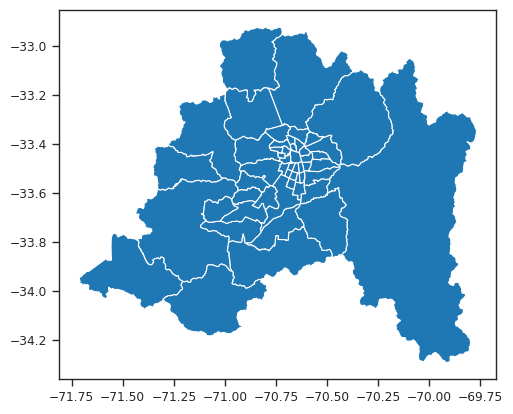

In [15]:
comunas = read_census_map(
    "comuna", path=CENSUS_GEO_ROOT / "R13"
)

comunas.plot()

<Axes: >

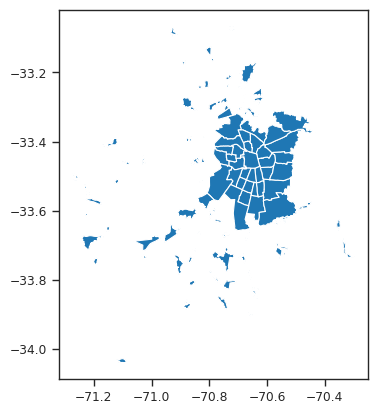

In [16]:
limites_urbanos = read_census_map(
    "limite_urbano_censal", path=CENSUS_GEO_ROOT / "R13"
)

limites_urbanos.plot()

http://bboxfinder.com

In [17]:
scl_bounds = [-70.88006218, -33.67612715, -70.43015094, -33.31069169]

/home/egraells/resources/aves/src/aves/features/geo.py:27: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ).pipe(lambda x: x[x.geometry.area > 0])


<Axes: >

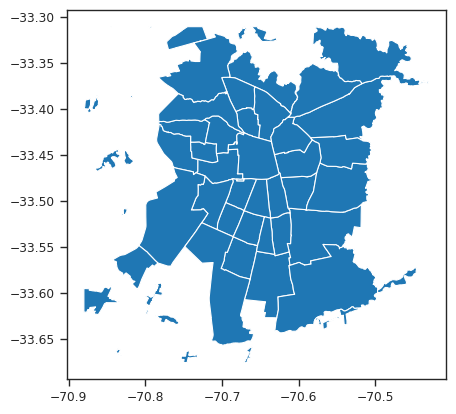

In [18]:
from aves.features.geo import clip_area_geodataframe

scl = clip_area_geodataframe(limites_urbanos, scl_bounds)
scl.plot()

In [19]:
scl

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,geometry
6,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13402,BUIN,EL RULO,URBANO,PUEBLO,0.079659,0.000084,"POLYGON ((-70.66394 -33.66802, -70.66398 -33.6..."
11,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,PUDAHUEL,LO AGUIRRE,URBANO,PUEBLO,0.048678,0.000102,"POLYGON ((-70.82464 -33.44531, -70.82463 -33.4..."
12,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,CERRO NAVIA,CERRO NAVIA,CAPITAL COMUNAL,CIUDAD,0.170180,0.001076,"POLYGON ((-70.71888 -33.41359, -70.71869 -33.4..."
13,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,PUDAHUEL,PUDAHUEL,CAPITAL COMUNAL,CIUDAD,0.183893,0.001552,"POLYGON ((-70.78133 -33.41712, -70.78131 -33.4..."
14,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,PUDAHUEL,CIUDAD DEL VALLE,URBANO,CIUDAD,0.126742,0.000256,"POLYGON ((-70.83449 -33.44636, -70.83447 -33.4..."
15,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,PUDAHUEL,EL CAMBUCHO,URBANO,PUEBLO,0.044334,0.000067,"POLYGON ((-70.86255 -33.39779, -70.86257 -33.3..."
16,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,PUDAHUEL,NOVICIADO ALTO,URBANO,PUEBLO,0.050539,0.000087,"POLYGON ((-70.87152 -33.40418, -70.87206 -33.4..."
17,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,PUDAHUEL,VILLA CAMPO ALEGRE,URBANO,PUEBLO,0.009700,0.000005,"POLYGON ((-70.81704 -33.38781, -70.81767 -33.3..."
21,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,COLINA,CHAMISERO,URBANO,CIUDAD,0.178211,0.000369,"MULTIPOLYGON (((-70.65390 -33.31075, -70.65372..."
34,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13302,LAMPA,VALLE GRANDE,URBANO,CIUDAD,0.137442,0.000876,"POLYGON ((-70.72393 -33.31342, -70.72391 -33.3..."


In [20]:
# comunas_urbanas["NombreComuna"] = comunas_urbanas["NombreComuna"].replace(
#     {"Á": "A", "Ú": "U", "Ó": "O", "Í": "I", "É": "E"}, regex=True
# )


<Axes: >

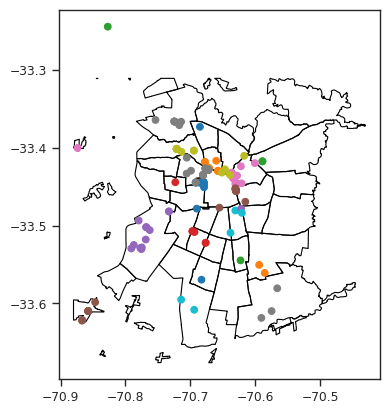

In [21]:
ax = scl.plot(edgecolor="black", facecolor="none")
gdf[(gdf["COMUNAREAL"] != gdf["Comuna_1"]) & (gdf["Comuna_1"] == "SANTIAGO")].to_crs(scl.crs).plot(
    column="COMUNAREAL", ax=ax
)


<Axes: >

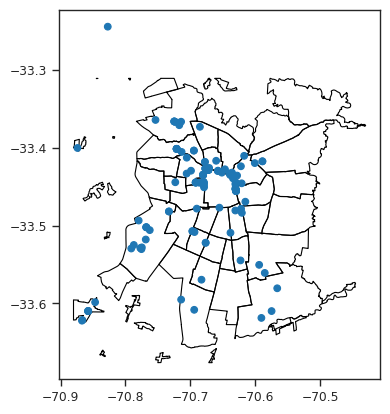

In [22]:
ax = scl.plot(edgecolor="black", facecolor="none")
gdf[(gdf["COMUNAREAL"] != gdf["Comuna_1"]) & (gdf["Comuna_1"] == "SANTIAGO")].to_crs(scl.crs).plot(
    column="Comuna_1", legend=False, ax=ax
)

=> Hay que usar "COMUNAREAL" si queremos estudiar comunas

Cruzaremos los datos para quedarnos con los accidentes en el ámbito urbano.

<Axes: >

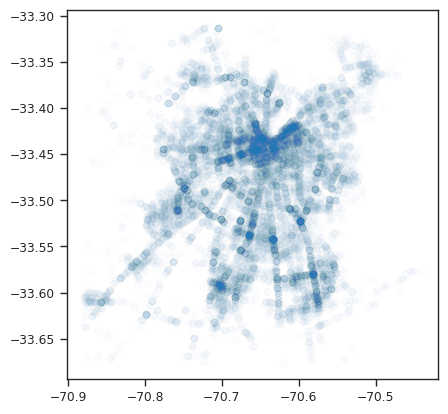

In [23]:
from aves.features.geo import clip_point_geodataframe

scl_accidents = clip_point_geodataframe(gdf.to_crs(scl.crs), scl_bounds)
scl_accidents.plot(alpha=0.01)

In [24]:
scl_accidents['Fecha'].describe()

count                                  18797
mean     2021-07-15 06:15:31.935947264+00:00
min                2021-01-01 00:00:00+00:00
25%                2021-04-17 00:00:00+00:00
50%                2021-07-24 00:00:00+00:00
75%                2021-10-16 00:00:00+00:00
max                2021-12-31 00:00:00+00:00
Name: Fecha, dtype: object

In [25]:
scl_accidents.columns

Index(['FID', 'FID_1', 'LABELID', 'POINT_X', 'POINT_Y', 'FID_2', 'COMUNAREAL',
       'VAL_COM', 'OBJECTID', 'A_O', 'IDACCIDENT', 'REGION', 'COD_COMUN',
       'COMUNA', 'CALLE_UNO', 'CALLE_DOS', 'NUMERO', 'DIR_GEOCOD', 'PAIS',
       'TIPO', 'OBJECTID_1', 'Año', 'Idaccide_1', 'Claseaccid', 'Fecha',
       'Hora', 'Cód_Regi', 'Región', 'Cód_Comun', 'Comuna_1', 'Cód_Tipo_',
       'Tipo_Accid', 'Cód_Tipo1', 'Tipo__CONA', 'Cód_Zona', 'Zona',
       'Cód_Ubica', 'Ubicación', 'Cód_Causa', 'Causa__CON', 'Cód_Cau_1',
       'Causa', 'Cód_Calle', 'Calle_Un_1', 'Cód_Cal_1', 'Calle_Do_1',
       'Intersecci', 'Número', 'Ruta', 'Cód_Ruta', 'Ubicaci_1', 'Km_Vía_Fe',
       'Pistas_de_', 'Pistas_de1', 'Cód_Calza', 'Calzada', 'Cód__Tipo',
       'Tipo_Calza', 'Cód_Estad', 'Estado_Cal', 'Cód_Condi', 'Condición',
       'Cód_Est_1', 'Estado_Atm', 'Fallecidos', 'Graves', 'Menos_Grav',
       'Leves', 'Ilesos', 'geometry'],
      dtype='object')

## ¿Qué contiene?

In [26]:
scl_accidents['Km_Vía_Fe'].value_counts()

Km_Vía_Fe
    18797
Name: count, dtype: int64

In [27]:
scl_accidents['Condición'].value_counts()

Condición
SECO          18287
HUMEDO          308
MOJADO          161
CON ACEITE       13
ESCARCHA         10
GRAVILLA          8
                  7
OTROS             3
Name: count, dtype: int64

In [28]:
scl_accidents['Tipo__CONA'].value_counts()

Tipo__CONA
COLISION     12458
CHOQUE        3935
ATROPELLO     1238
VOLCADURA      695
OTRO TIPO      276
CAIDA          194
INCENDIO         1
Name: count, dtype: int64

In [29]:
scl_accidents['Causa__CON'].value_counts()

Causa__CON
IMPRUDENCIA DEL CONDUCTOR         10935
DESOBEDIENCIA A SEÑALIZACION       2214
CAUSAS NO DETERMINADAS             1647
OTRAS CAUSAS                       1552
ALCOHOL EN CONDUCTOR                933
PERDIDA CONTROL VEHICULO            664
IMPRUDENCIA DEL PEATON              297
VELOCIDAD IMPRUDENTE                276
FALLAS MECANICAS                    128
DROGAS Y/O FATIGA EN CONDUCTOR       58
DEFICIENCIAS VIALES                  47
IMPRUDENCIA DEL PASAJERO             31
ALCOHOL EN PEATON                    15
Name: count, dtype: int64

In [30]:
scl_accidents['Fallecidos'].value_counts()

Fallecidos
0    18579
1      211
2        7
Name: count, dtype: int64

In [31]:
scl_accidents['Graves'].value_counts()

Graves
0    17049
1     1677
2       61
3        9
4        1
Name: count, dtype: int64

In [32]:
scl_accidents['Menos_Grav'].value_counts()

Menos_Grav
0    18142
1      625
2       26
3        3
7        1
Name: count, dtype: int64

In [33]:
scl_accidents['Leves'].value_counts()

Leves
0    13902
1     3844
2      826
3      163
4       40
5       15
6        5
8        1
7        1
Name: count, dtype: int64

In [34]:
scl_accidents['Ilesos'].value_counts()

Ilesos
2    8265
1    8030
0    1939
3     475
4      66
5      13
6       7
7       2
Name: count, dtype: int64

In [35]:
scl_accidents["victimas"] = scl_accidents[
    ["Ilesos", "Graves", "Menos_Grav", "Fallecidos", "Leves"]
].sum(axis=1)

<Axes: xlabel='victimas'>

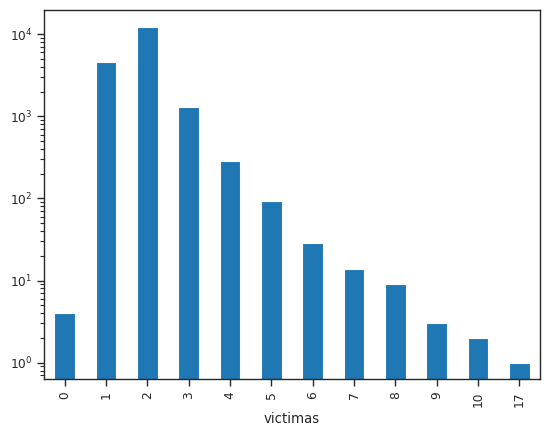

In [36]:
scl_accidents["victimas"].value_counts(sort=False).sort_index().plot(
    kind="bar", logy=True
)

In [37]:
scl_accidents['Fecha']

4       2021-07-11 00:00:00+00:00
9       2021-07-22 00:00:00+00:00
11      2021-09-11 00:00:00+00:00
14      2021-09-24 00:00:00+00:00
15      2021-10-18 00:00:00+00:00
                   ...           
20910   2021-01-12 00:00:00+00:00
20911   2021-02-13 00:00:00+00:00
20912   2021-02-13 00:00:00+00:00
20913   2021-02-18 00:00:00+00:00
20914   2021-04-05 00:00:00+00:00
Name: Fecha, Length: 18797, dtype: datetime64[ns, UTC]

In [38]:
scl_accidents['Hora']

4       1899-12-30 00:00:00+00:00
9       1899-12-30 00:00:00+00:00
11      1899-12-30 00:00:00+00:00
14      1899-12-30 00:00:00+00:00
15      1899-12-30 00:00:00+00:00
                   ...           
20910   1899-12-30 00:00:00+00:00
20911   1899-12-30 00:00:00+00:00
20912   1899-12-30 00:00:00+00:00
20913   1899-12-30 00:00:00+00:00
20914   1899-12-30 00:00:00+00:00
Name: Hora, Length: 18797, dtype: datetime64[ns, UTC]

In [39]:
scl_accidents['Estado_Atm'].value_counts()

Estado_Atm
DESPEJADO    17811
NUBLADO        827
LLUVIA         109
LLOVIZNA        29
NEBLINA         21
Name: count, dtype: int64

In [40]:
scl_accidents['Estado_Cal'].value_counts()

Estado_Cal
BUENO      15358
REGULAR     3395
MALO          44
Name: count, dtype: int64

In [41]:
scl_accidents['Ubicación'].value_counts()

Ubicación
TRAMO DE VIA RECTA                8441
CRUCE CON SEMAFORO FUNCIONANDO    5030
CRUCE CON SEÑAL PARE              1943
CRUCE CON SEÑAL CEDA EL PASO      1119
OTROS NO CONSIDERADOS             1067
CRUCE SIN SEÑALIZACION             614
ACERA O BERMA                      155
ROTONDA                            116
CRUCE CON SEMAFORO APAGADO          91
TRAMO DE VIA CURVA HORIZONTAL       82
ENLACE A NIVEL                      39
TRAMO DE VIA CURVA VERTICAL         31
ENLACE A DESNIVEL                   21
TUNEL                               18
ACCESO NO HABILITADO                11
PUENTE                               9
PLAZA DE PEAJE                       7
CRUCE REGULADO POR CARABINERO        3
Name: count, dtype: int64

## ¿Cuándo?

<Axes: xlabel='Fecha'>

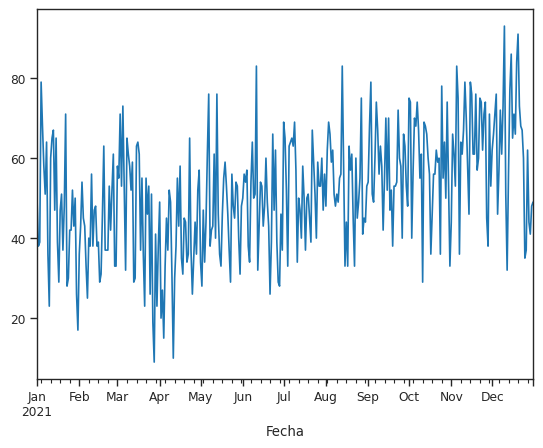

In [42]:
scl_accidents.resample('1d', on='Fecha').size().plot()

<Axes: xlabel='Fecha'>

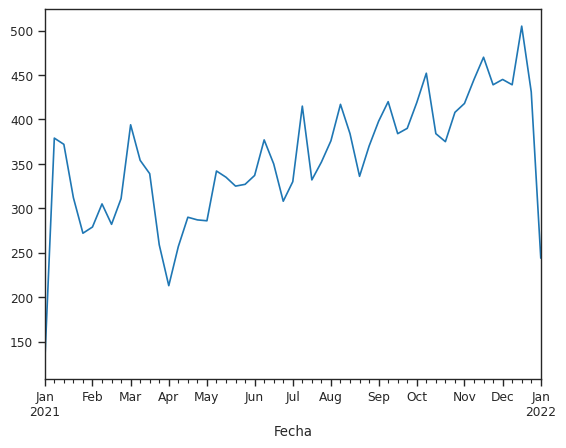

In [43]:
scl_accidents.resample('1W', on='Fecha').size().plot()

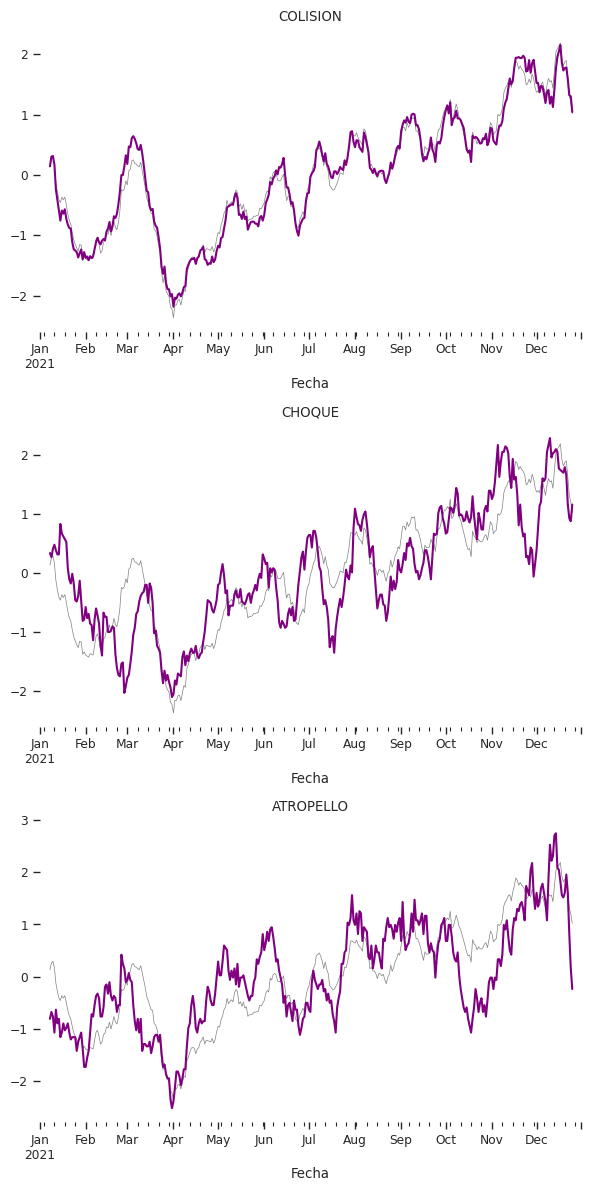

In [45]:
fig, axes = plt.subplots(3, 1, figsize=(6, 12))

mean_accidents = (
    lambda name, x: x.resample("1d", on="Fecha")
    # .size()
    ["victimas"]
    .sum()
    .rolling(14, center=True)
    .mean()
    .rename(name)
    .to_frame()
    .apply(lambda x: (x - x.mean()) / x.std())
)

for ax, cat in zip(axes, ["COLISION", "CHOQUE", "ATROPELLO"]):
    # print(g)
    g = scl_accidents[scl_accidents["Tipo__CONA"] == cat]
    mean_accidents("all", scl_accidents).plot(ax=ax, color="grey", linewidth=0.5, legend=False)
    mean_accidents(cat, g).plot(ax=ax, linewidth=1.5, color="purple", legend=False)
    ax.set_title(cat)
    sns.despine(ax=ax, left=True, bottom=True)

fig.tight_layout()

## ¿Dónde?

<Axes: >

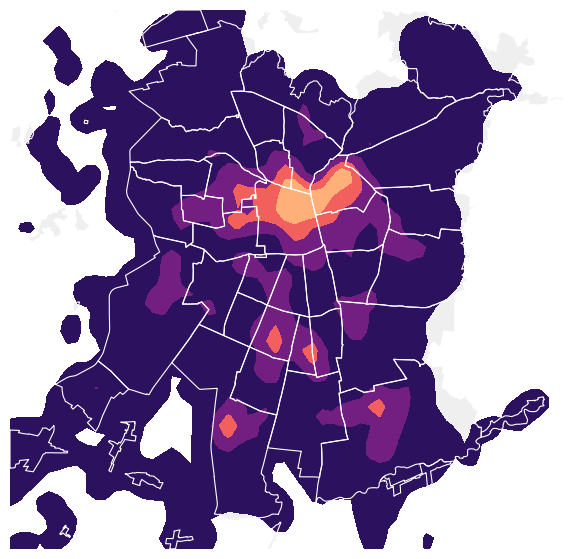

In [46]:
from aves.visualization.maps import heat_map, heatmap
from aves.visualization.figures import small_multiples_from_geodataframe

fig, ax = small_multiples_from_geodataframe(scl, 1, height=7)

scl.plot(ax=ax, facecolor="#efefef", edgecolor="none")
heat_map(ax, scl_accidents, weight="victimas", bandwidth=0.005, low_threshold=0.005)
scl.plot(ax=ax, facecolor="none", edgecolor="white")

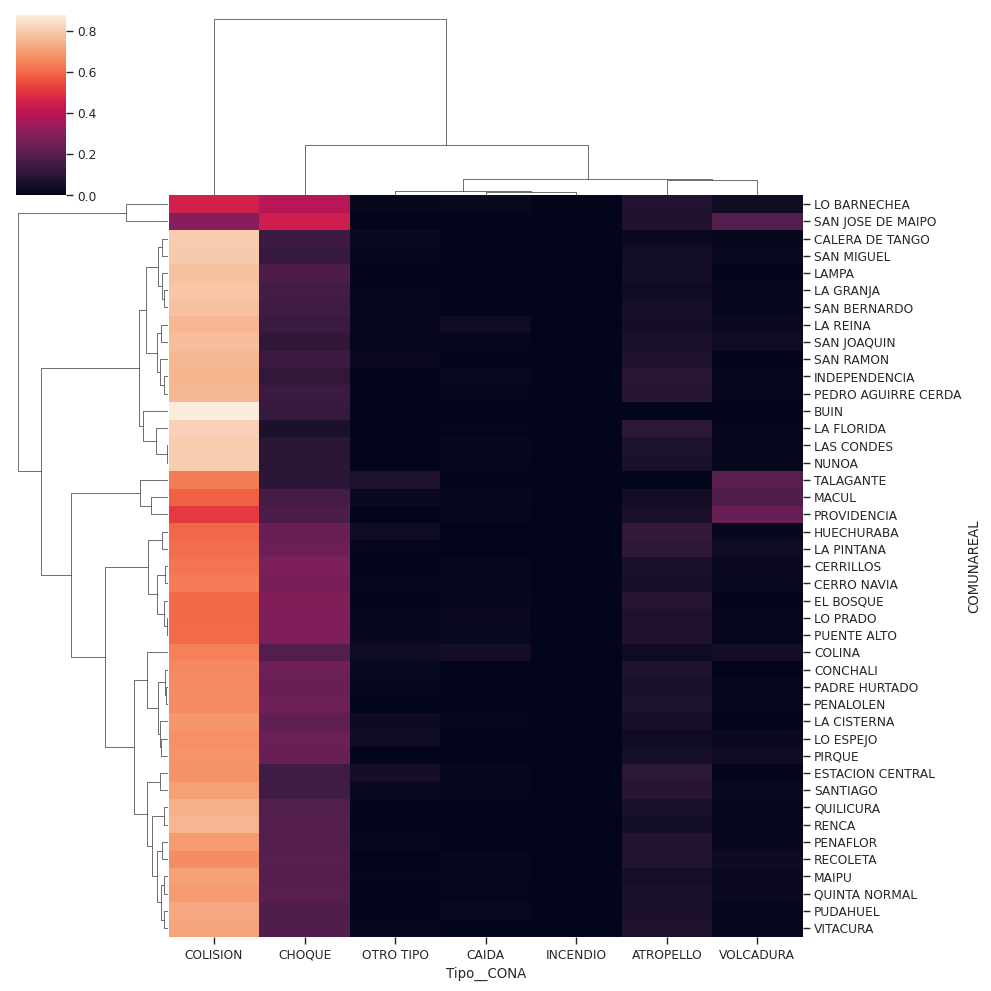

In [47]:
from aves.features.utils import normalize_rows

victimas_por_comuna = (
    scl_accidents.groupby(["COMUNAREAL", "Tipo__CONA"])["victimas"]
    .sum()
    .unstack(fill_value=0)
    .pipe(normalize_rows)
)
sns.clustermap(victimas_por_comuna, method="ward")

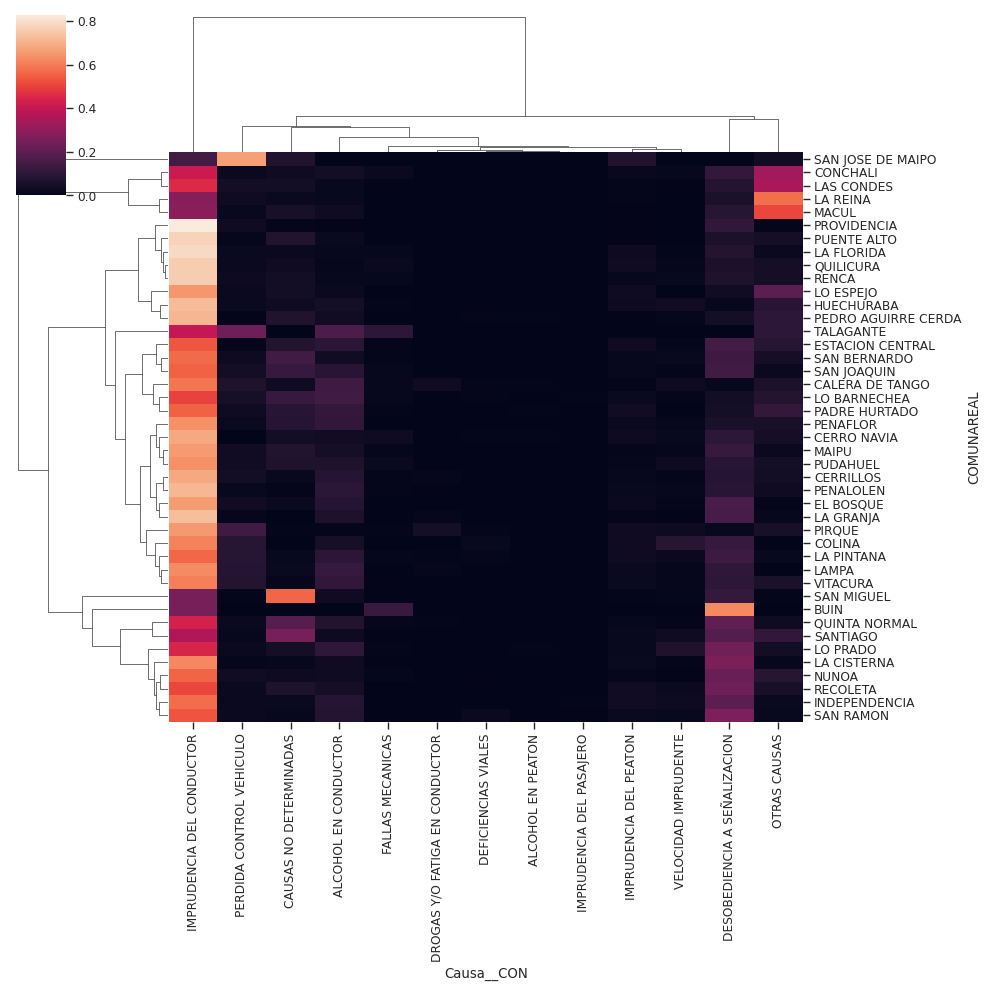

In [48]:
causas_por_comuna = (
    scl_accidents.groupby(["COMUNAREAL", "Causa__CON"])["victimas"]
    .sum()
    .unstack(fill_value=0)
    .pipe(normalize_rows)
)
sns.clustermap(causas_por_comuna, method="ward")

## ¿Cómo?

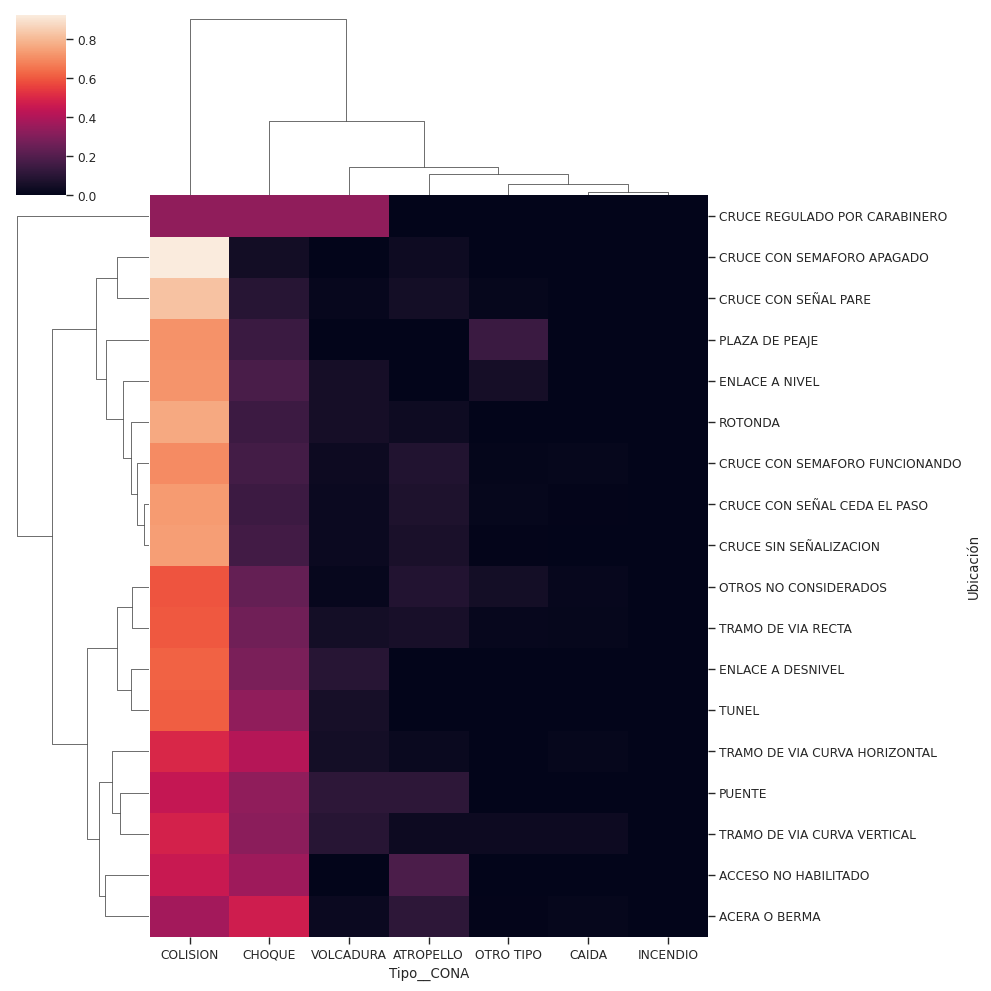

In [49]:
sns.clustermap(
    scl_accidents.groupby("Ubicación")["Tipo__CONA"]
    .value_counts()
    .unstack(fill_value=0)
    .pipe(normalize_rows)
)

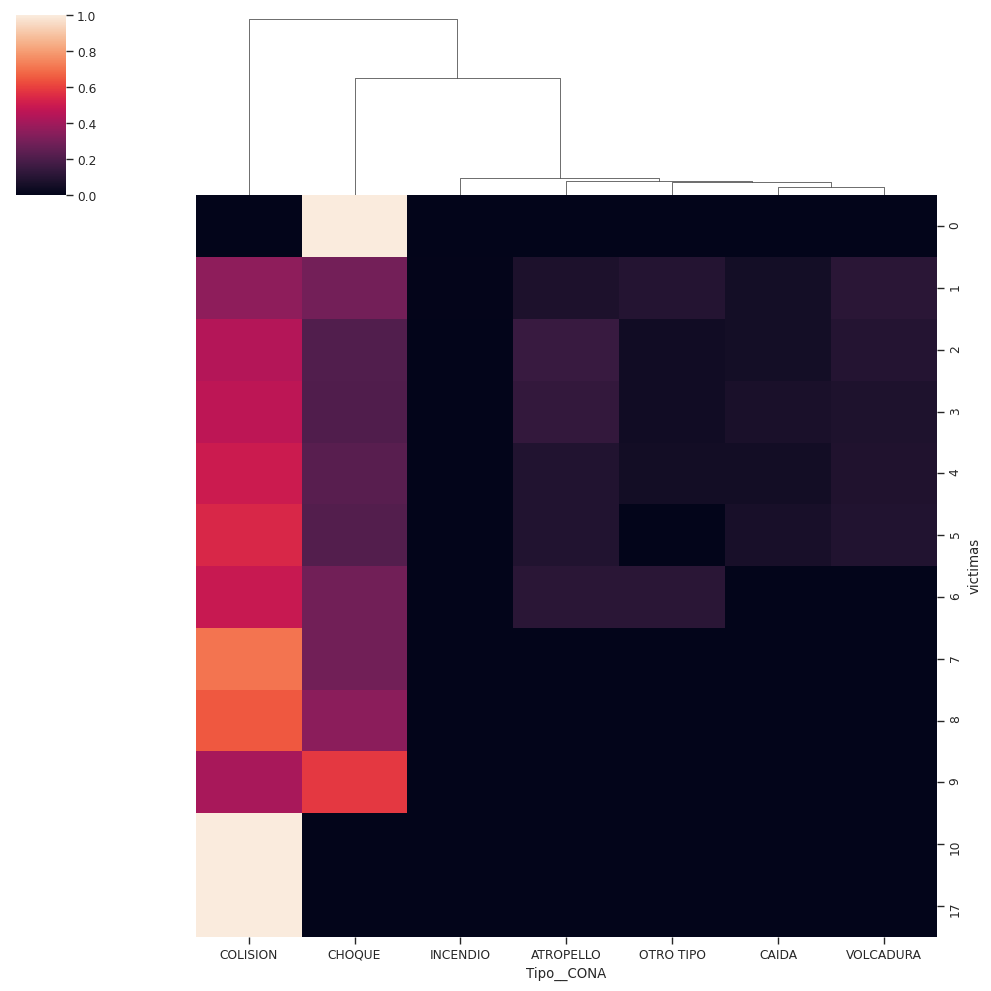

In [50]:
import numpy as np

sns.clustermap(
    scl_accidents.groupby("Tipo__CONA")["victimas"]
    .value_counts()
    .unstack(fill_value=0).T
    .pipe(np.sqrt)
    .pipe(normalize_rows)
    ,
    row_cluster=False,
)

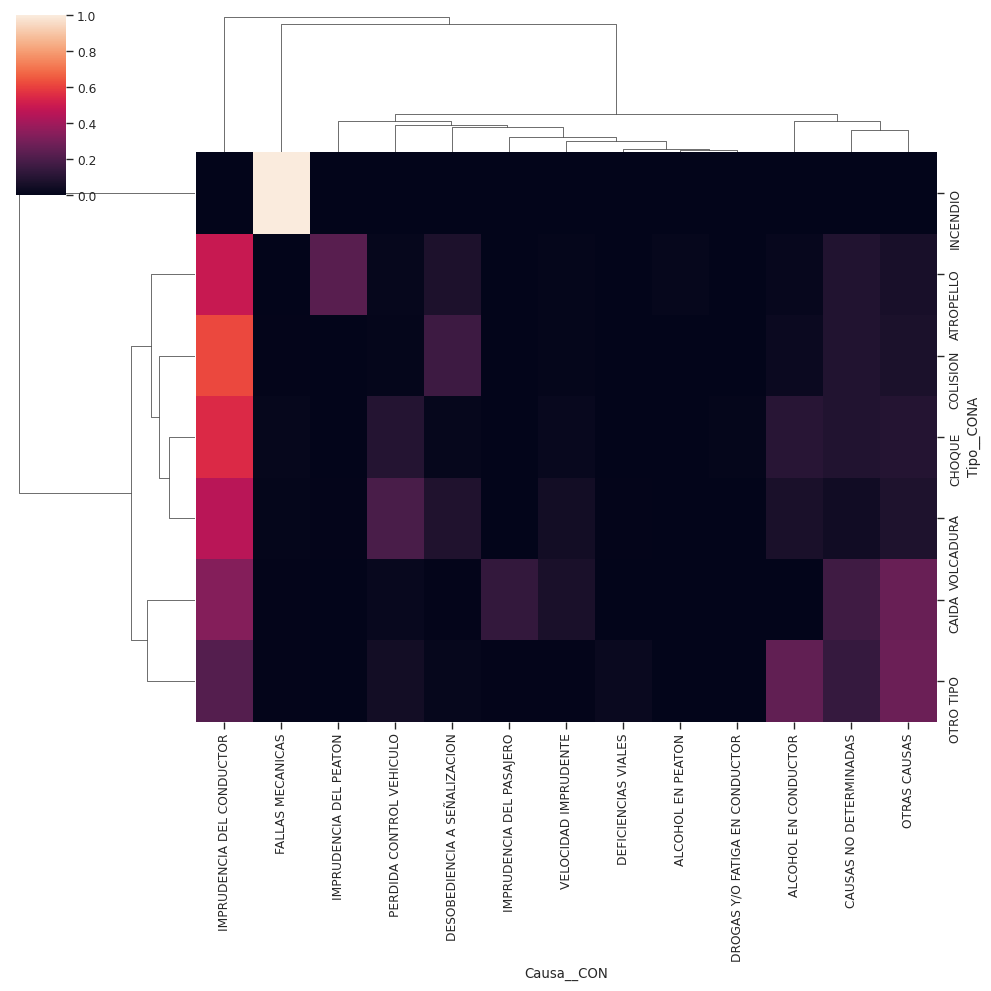

In [51]:
sns.clustermap(
    scl_accidents.groupby("Tipo__CONA")["Causa__CON"]
    .value_counts()
    .unstack(fill_value=0)
    .pipe(normalize_rows)
)

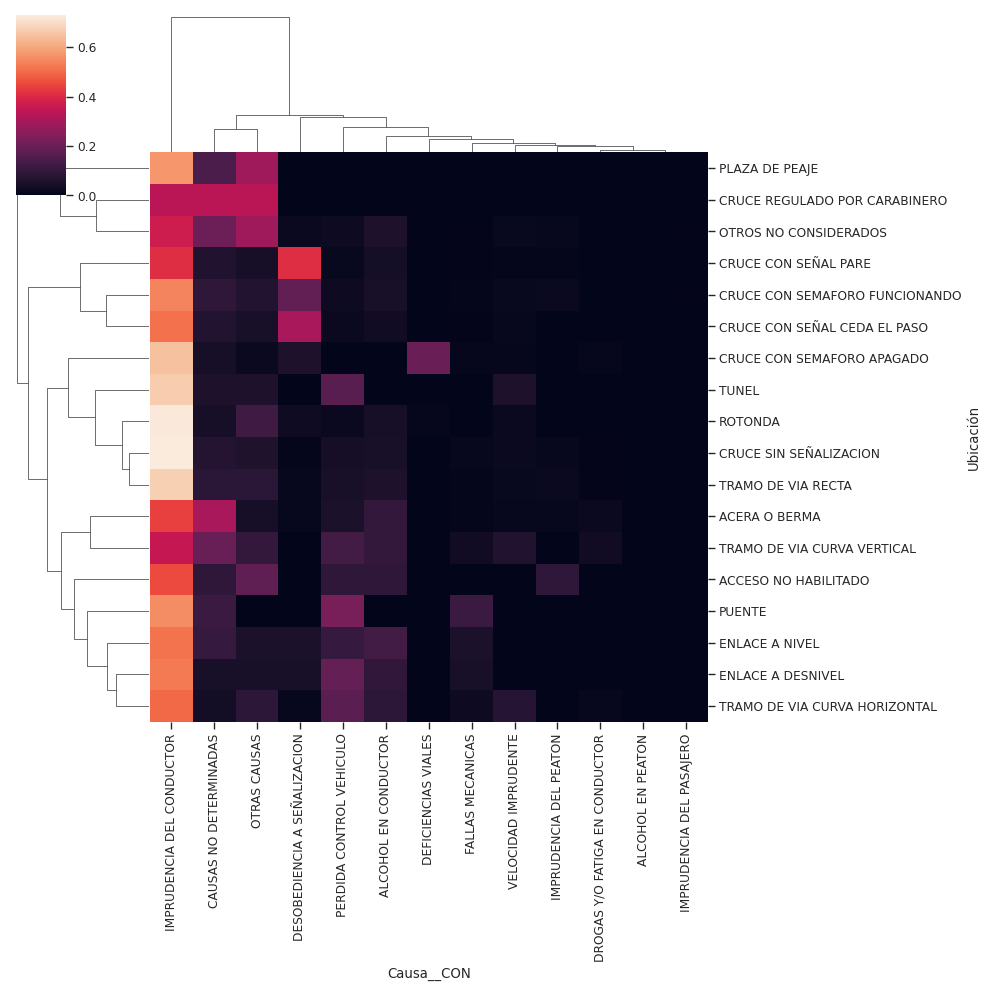

In [52]:
sns.clustermap(
    scl_accidents.groupby("Ubicación")["Causa__CON"]
    .value_counts()
    .unstack(fill_value=0)
    .pipe(normalize_rows)
)

# Entonces...

¿Es factible hacer algo con estos datos? Sí, aunque pareciera que se debe hacer algo a nivel general. La granularidad espacial es buena, pero temporalmente se pierde información. Además hay pocos meta-datos de los accidentes relacionados con las condiciones en las que sucedieron, por ej., no se incluye el vehículo o las características de las personas.

Una **propuesta iterada** podría aprovechar los datos que sí están disponibles. Por ej.:

- Determinar los riesgos de distintos tipos de accidente en épocas del año (se requiere correlacionar con datos de movilidad para predecir información sobre desplazamientos)
- Determinar dónde (tanto a nivel micro como a nivel meso/comuna) realizar intervenciones viales que reduzcan la cantidad o severidad de los accidentes.
- Ver datos de más años y, en caso de que tengan la misma estructura y meta-datos, ver evolución de accidentes respecto a intervenciones en la ciudad (ej.: ley de velocidad, ley de airbags, nuevas líneas de metro, etc.)
